<a href="https://colab.research.google.com/github/Revo-hero/lung_cancer/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"biplabnayak","key":"b574a2df708b388dce2cf674aa6a32eb"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 87% 103M/119M [00:00<00:00, 138MB/s] 
100% 119M/119M [00:00<00:00, 146MB/s]


In [ ]:
!unzip chest-ctscan-images.zip

In [ ]:
!rm chest-ctscan-images.zip

In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir('/content/Data/train')

['squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'normal',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa']

In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
class_labels={'adenocarcinoma':1,'large.cell.carcinoma':2,'squamous.cell.carcinoma':3,'normal':0}

In [ ]:
class_names=['adenocarcinoma','large.cell.carcinoma','squamous.cell.carcinoma','normal']

In [ ]:
cl={'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib':1,'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa':2,'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa':3,'normal':0}

In [ ]:
IMG_SIZE = 224
X_image_train = []
Y_image = []

for i in os.listdir('/content/Data/train'):
    train_class = os.listdir(os.path.join('/content/Data/train', i))
    for j in train_class:

      img = os.path.join('/content/Data/train', i, j)
      img = cv2.imread(img)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
      X_image_train.append(img)
      Y_image.append(cl[i])
print(len(X_image_train))


613


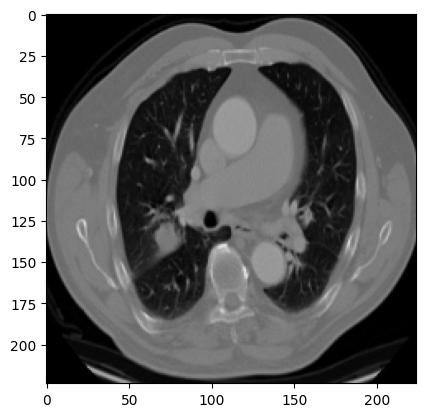

In [ ]:
plt.imshow(X_image_train[0])

In [ ]:
for i in os.listdir('/content/Data/test'):
    train_class = os.listdir(os.path.join('/content/Data/test', i))
    for j in train_class:

      img = os.path.join('/content/Data/test', i, j)
      img = cv2.imread(img)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
      X_image_train.append(img)
      Y_image.append(class_labels[i])
print(len(X_image_train))

928


In [ ]:
for i in os.listdir('/content/Data/valid'):
    train_class = os.listdir(os.path.join('/content/Data/valid', i))
    for j in train_class:

      img = os.path.join('/content/Data/valid', i, j)
      img = cv2.imread(img)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
      X_image_train.append(img)
      Y_image.append(cl[i])
print(len(X_image_train))

1000


In [ ]:
X_image_array=[]
for x in range(0, len(X_image_train)):
    X_image=np.array(X_image_train[x],dtype='uint8')
    X_image_array.append(X_image)

In [ ]:
labels= []
for x in Y_image:
    a = []
    a.append(x)
    labels.append(a)
labels = np.array(labels,dtype='uint8')
labels.shape

(1000, 1)

In [ ]:
target1 = labels
features = np.array(X_image_array)
features.shape

(1000, 224, 224, 3)

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, roc_curve, auc

from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
#import tensorflow_addons as tfa
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Input, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, ZeroPadding2D, Conv2D, Activation, MaxPooling2D, MaxPool2D, Add
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
training = features
target = labels
for trn_idx, val_idx in folds.split(training, target):
    print("TRAIN:", trn_idx, "TEST:", val_idx)
    trainX, x_test = training[trn_idx], training[val_idx]
    trainY, y_test = target[trn_idx], target[val_idx]
    break

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  23  24  25  26  27  29  30  31  32  33  34  36  37  38
  39  40  41  42  43  45  46  48  50  57  58  59  60  61  62  63  65  67
  68  69  70  71  72  73  75  76  77  78  79  81  82  83  84  85  86  87
  89  90  91  95  97  98  99 100 101 102 104 105 106 107 108 109 110 111
 112 113 114 116 117 118 119 121 122 123 124 125 126 127 128 129 131 133
 135 137 138 139 141 142 144 146 148 149 151 152 153 154 155 157 160 161
 162 163 164 165 167 169 170 172 173 176 177 178 179 180 181 182 183 187
 188 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 213 215 216 217 218 219 220 222 223 225 226 227 231
 232 233 234 235 236 237 238 240 241 243 245 246 248 250 251 252 253 254
 255 256 258 259 260 262 264 265 266 267 268 269 271 272 273 274 275 276
 277 278 279 280 282 283 284 285 286 287 288 289 290 291 292 293 295 296
 297 298 299 300 302 303 304 306 307 308 310

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
training = trainX
target = trainY
for trn_idx, test_idx in folds.split(training, target):
    print("TRAIN:", trn_idx, "TEST:", val_idx)
    x_train, x_validate = training[trn_idx], training[test_idx]
    y_train, y_validate = target[trn_idx], target[test_idx]
    break

TRAIN: [  0   2   3   5   8   9  10  12  13  14  15  16  17  18  19  20  21  22
  23  24  27  28  29  30  31  32  33  34  35  36  37  39  41  43  44  45
  46  47  48  50  51  52  53  54  56  58  59  60  61  62  63  64  65  66
  67  68  69  70  72  73  74  75  77  78  79  80  81  82  83  85  87  88
  89  91  93  94  95  96  97  98  99 100 101 102 104 105 106 107 110 111
 112 113 114 116 117 118 119 120 122 124 125 126 127 128 129 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 160 161 163 164 165 166 168 169 171 172 173 174
 176 177 179 180 181 182 183 184 185 187 188 190 191 192 193 194 195 196
 197 198 199 201 203 204 205 207 208 209 210 211 213 214 215 216 217 218
 219 220 221 222 223 224 225 228 229 231 233 234 235 236 237 238 239 240
 241 242 244 245 246 247 248 249 250 251 252 253 254 256 257 258 260 261
 262 263 264 266 267 268 269 271 272 273 275 276 277 278 279 280 282 283
 284 285 286 287 288 289 290 291 294 295 296

In [ ]:
X_image_array = []
features = []

<Axes: ylabel='count'>

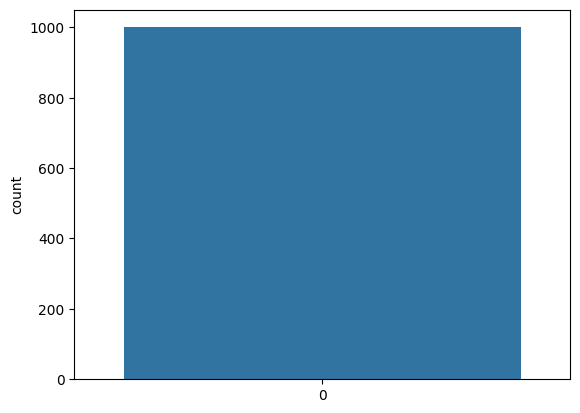

In [ ]:
sns.countplot(Y_image)

In [ ]:
import PIL
from PIL import Image

In [ ]:
No_images_per_class = []
for i in os.listdir('/content/Data/train'):

  train_class = os.listdir(os.path.join('/content/Data/train', i))
  No_images_per_class.append(len(train_class))
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa = 155 

Number of images in adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib = 195 

Number of images in normal = 148 

Number of images in large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa = 115 



In [ ]:
No_images_per_class = []
for i in os.listdir('/content/Data/test'):

  train_class = os.listdir(os.path.join('/content/Data/test', i))
  No_images_per_class.append(len(train_class))
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in normal = 54 

Number of images in adenocarcinoma = 120 

Number of images in large.cell.carcinoma = 51 

Number of images in squamous.cell.carcinoma = 90 



In [ ]:
No_images_per_class = []
for i in os.listdir('/content/Data/valid'):

  train_class = os.listdir(os.path.join('/content/Data/valid', i))
  No_images_per_class.append(len(train_class))
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa = 15 

Number of images in adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib = 23 

Number of images in normal = 13 

Number of images in large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa = 21 



([<matplotlib.patches.Wedge at 0x7f7ba4ec7d90>,
 [Text(0.872688684769691, 0.6696375582917576, 'adenocarcinoma'),
  Text(-0.7431492115034984, 0.811005085953059, 'large.cell.carcinoma'),
  Text(-0.811005085953059, -0.7431492115034984, 'squamous.cell.carcinoma'),
  Text(0.6696375174382511, -0.8726887161176866, 'normal')])

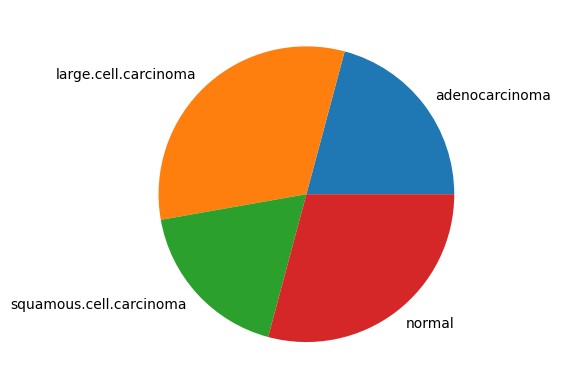

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels= class_names)

##RESNET

In [ ]:
IMAGE_SIZE = (224, 224, 3)

trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
baseModel = ResNet50(input_shape=IMAGE_SIZE, weights="imagenet", include_top=False)

baseModel.summary()

In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
#headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = GlobalAveragePooling2D()(headModel)
headModel = Dense(4, activation="softmax")(headModel)

res_model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
res_model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics= ['accuracy'],run_eagerly=True)

earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpointer = ModelCheckpoint(filepath="RES_weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
res_history = res_model.fit(x_train,
                            y_train,
                            batch_size=50,
                            epochs=5,
                            validation_data=(x_validate, y_validate),
                            callbacks=[checkpointer, earlystopping],)


Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 1.3717 - accuracy: 0.4125 
Epoch 1: val_loss improved from inf to 0.92654, saving model to RES_weights.hdf5
13/13 [==============================] - 579s 45s/step - loss: 1.3717 - accuracy: 0.4125 - val_loss: 0.9265 - val_accuracy: 0.5375
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 0.9969 - accuracy: 0.5031 
Epoch 2: val_loss improved from 0.92654 to 0.88125, saving model to RES_weights.hdf5
13/13 [==============================] - 560s 43s/step - loss: 0.9969 - accuracy: 0.5031 - val_loss: 0.8813 - val_accuracy: 0.5375
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 0.9361 - accuracy: 0.5031 
Epoch 3: val_loss improved from 0.88125 to 0.86741, saving model to RES_weights.hdf5
13/13 [==============================] - 559s 43s/step - loss: 0.9361 - accuracy: 0.5031 - val_loss: 0.8674 - val_accuracy: 0.5750
Epoch 4/5
13/13 [==============================] - ETA: 0s - loss: 0.8673 

'\nhistory = res_model.fit_generator(\n    train_gen,\n    validation_data = val_gen,\n    epochs = 10,\n    steps_per_epoch = len(train_gen) // 32, # 32 is the batch_size\n    validation_steps = len(val_gen) // 32,\n    callbacks=[checkpointer, earlystopping]\n)'

##VGG19

In [ ]:
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
baseModel = VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

baseModel.summary()

In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
#headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = GlobalAveragePooling2D()(headModel)
headModel = Dense(4, activation="softmax")(headModel)

vgg_model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics= ['accuracy'])

earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpointer = ModelCheckpoint(filepath="VGG_weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
print("[INFO] training head...")
vgg_history = vgg_model.fit(x=x_train,
                            y=y_train,
                            batch_size=50,
                            epochs=5,
                            validation_data=(x_validate, y_validate),
                            callbacks=[checkpointer, earlystopping],)

[INFO] training head...
Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 1.6543 - accuracy: 0.3906 
Epoch 1: val_loss improved from inf to 0.94047, saving model to VGG_weights.hdf5
13/13 [==============================] - 651s 51s/step - loss: 1.6543 - accuracy: 0.3906 - val_loss: 0.9405 - val_accuracy: 0.5500
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 1.0267 - accuracy: 0.5094 
Epoch 2: val_loss improved from 0.94047 to 0.86000, saving model to VGG_weights.hdf5
13/13 [==============================] - 616s 48s/step - loss: 1.0267 - accuracy: 0.5094 - val_loss: 0.8600 - val_accuracy: 0.5500
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 0.9167 - accuracy: 0.5391 
Epoch 3: val_loss improved from 0.86000 to 0.75668, saving model to VGG_weights.hdf5
13/13 [==============================] - 594s 46s/step - loss: 0.9167 - accuracy: 0.5391 - val_loss: 0.7567 - val_accuracy: 0.6000
Epoch 4/5
13/13 [==============================] -

##DENSENET MODEL

In [ ]:
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
baseModel = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

baseModel.summary()

In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
#headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = GlobalAveragePooling2D()(headModel)
headModel = Dense(4, activation="softmax")(headModel)

densenet_model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
densenet_model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics= ['accuracy'])

earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpointer = ModelCheckpoint(filepath="DENSENET_weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
print("[INFO] training head...")
densenet_history = densenet_model.fit(x=x_train,
                                      y=y_train,
                                      batch_size=50,
                                      epochs=5,
                                      validation_data=(x_validate, y_validate),
                                      callbacks=[checkpointer, earlystopping],)

[INFO] training head...
Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 1.2148 - accuracy: 0.4328 
Epoch 1: val_loss improved from 1.03966 to 1.02675, saving model to DENSENET_weights.hdf5
13/13 [==============================] - 184s 13s/step - loss: 1.2148 - accuracy: 0.4328 - val_loss: 1.0268 - val_accuracy: 0.5500
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 1.0643 - accuracy: 0.4984
Epoch 2: val_loss improved from 1.02675 to 0.98953, saving model to DENSENET_weights.hdf5
13/13 [==============================] - 147s 11s/step - loss: 1.0643 - accuracy: 0.4984 - val_loss: 0.9895 - val_accuracy: 0.5437
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 1.0368 - accuracy: 0.5078
Epoch 3: val_loss improved from 0.98953 to 0.93153, saving model to DENSENET_weights.hdf5
13/13 [==============================] - 162s 13s/step - loss: 1.0368 - accuracy: 0.5078 - val_loss: 0.9315 - val_accuracy: 0.5437
Epoch 4/5
13/13 [================

##CNN

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'sigmoid'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics= ['accuracy'])

earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpointer = ModelCheckpoint(filepath="classifier_weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
print("[INFO] training head...")
classifier_history = classifier.fit(x=x_train,
                                        y=y_train,
                                        batch_size=50,
                                        epochs=5,
                                        validation_data=(x_validate, y_validate),
                                        callbacks=[checkpointer, earlystopping],)

[INFO] training head...
Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 395.3375 - accuracy: 0.3234
Epoch 1: val_loss improved from inf to 4.46471, saving model to classifier_weights.hdf5
13/13 [==============================] - 61s 5s/step - loss: 395.3375 - accuracy: 0.3234 - val_loss: 4.4647 - val_accuracy: 0.5063
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 1.6193 - accuracy: 0.6531
Epoch 2: val_loss improved from 4.46471 to 1.09688, saving model to classifier_weights.hdf5
13/13 [==============================] - 62s 5s/step - loss: 1.6193 - accuracy: 0.6531 - val_loss: 1.0969 - val_accuracy: 0.5125
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 0.6492 - accuracy: 0.7578
Epoch 3: val_loss improved from 1.09688 to 0.79923, saving model to classifier_weights.hdf5
13/13 [==============================] - 48s 4s/step - loss: 0.6492 - accuracy: 0.7578 - val_loss: 0.7992 - val_accuracy: 0.6625
Epoch 4/5
13/13 [=================

##MOBILENET

In [ ]:
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
baseModel = MobileNet(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

baseModel.summary()

In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
#headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = GlobalAveragePooling2D()(headModel)
headModel = Dense(4, activation="softmax")(headModel)

mobilenet_model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
mobilenet_model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics= ['accuracy'])

earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpointer = ModelCheckpoint(filepath="MOBILENET_weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
mobilenet_history = mobilenet_model.fit(x=x_train,
                                        y=y_train,
                                        batch_size=50,
                                        epochs=5,
                                        validation_data=(x_validate, y_validate),
                                        callbacks=[checkpointer, earlystopping],)

Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 1.2788 - accuracy: 0.4203
Epoch 1: val_loss improved from inf to 0.80798, saving model to MOBILENET_weights.hdf5
13/13 [==============================] - 47s 3s/step - loss: 1.2788 - accuracy: 0.4203 - val_loss: 0.8080 - val_accuracy: 0.6062
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 0.9288 - accuracy: 0.5844
Epoch 2: val_loss improved from 0.80798 to 0.75938, saving model to MOBILENET_weights.hdf5
13/13 [==============================] - 41s 3s/step - loss: 0.9288 - accuracy: 0.5844 - val_loss: 0.7594 - val_accuracy: 0.6438
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 0.8217 - accuracy: 0.6016
Epoch 3: val_loss improved from 0.75938 to 0.61913, saving model to MOBILENET_weights.hdf5
13/13 [==============================] - 42s 3s/step - loss: 0.8217 - accuracy: 0.6016 - val_loss: 0.6191 - val_accuracy: 0.7125
Epoch 4/5
13/13 [==============================] - ETA: 0s - loss